In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
#reading the dataset
df=pd.read_csv("phl_hec_all_confirmed.csv")
print("number of rows= ",df.shape[0])
print("number of columns= ",len(df.columns))


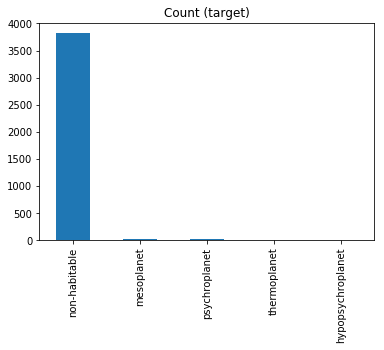

In [4]:
target_count = df['P. Habitable Class'].value_counts()
target_count.plot(kind='bar', title='Count (target)')

In [5]:
#from the above figure we can understand that the dataset is highly biased
#since our dataset is highly biased(majority of them are non-habitable) we are applying sampling(under-sampling)
#removing the rows containing 'gas' as composition class since all the planets with gas compostion is non-habitable
indexNames = df[df['P. Composition Class']=='gas'].index
 # Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
print("number of rows after removing planets with gaseous composition= ",df.shape[0])


number of rows after removing planets with gaseous composition=  1801


In [6]:
#finding number of planets in each category
print(df['P. Habitable Class'].value_counts())

non-habitable        1747
mesoplanet             31
psychroplanet          17
thermoplanet            3
hypopsychroplanet       3
Name: P. Habitable Class, dtype: int64


In [7]:
#since number of samples in hypopsychroplanet and thermoplanet is very less compared to total number of samples in the dataset
# it is not suitable for classification task and therefor these two classes are not considered for prediction

#removing rows containing hypopsychroplanet and thermoplanet classes
# Get names of indexes for which Habitable class is either hypopsychroplanet or thermoplanet
indexNames = df[(df['P. Habitable Class'] == "hypopsychroplanet") | (df['P. Habitable Class'] == "thermoplanet") ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
print(df['P. Habitable Class'].value_counts())
print("final number of rows= ",df.shape[0])


non-habitable    1747
mesoplanet         31
psychroplanet      17
Name: P. Habitable Class, dtype: int64
final number of rows=  1795


In [8]:
#DIMENTIONALITY REDUCTION
# 1) based on missing value ratio
#if the missing value ratio is greater than 90% then drop the column
filtered_col = df.columns[df.isnull().mean()>0.9]
print("removed rows= ",filtered_col)
df=df.drop(list(filtered_col),axis=1)
print(len(df.columns))

removed rows=  Index(['P. Max Mass (EU)', 'P. Inclination (deg)', 'S. Name HD', 'S. Name HIP',
       'Unnamed: 68'],
      dtype='object')
64


In [11]:
# 2) based on the variance of each coloumn
#An attribute with low variance not really separating data points in anyway.so we can remove that coloumn
l=[]
threshold=0.8
for i in df.columns:
    max_rfrequency = df[i].value_counts(normalize=True, dropna=False).values[0]#finding maximum value of the relative frequency of values in that column
    if(max_rfrequency>threshold):
        l.append(i)
l.remove('P. Habitable Class')
print("removed columns= ",l)
df=df.drop(l,axis=1)
print(len(df.columns))


removed columns=  ['P. Zone Class', 'P. Composition Class', 'P. Min Mass (EU)', 'P. Eccentricity', 'P. Omega (deg)', 'S. No. Planets HZ', 'P. SPH', 'P. Int ESI', 'P. Surf ESI', 'S. HabCat', 'P. Habitable', 'P. Hab Moon', 'P. Confirmed']
51


In [2]:
#removing name of the host star, year of discovery and other unnecessary columns which are unnecessary  for classification
l=['P. Name','P. Name Kepler','P. Name KOI','S. Name','P. Disc. Year','P. Disc. Method','S. Constellation','S. Type']
df=df.drop(l,axis=1)
print("final length of input features= ",len(df.columns))

NameError: name 'df' is not defined

In [9]:
print(df.dtypes)

P. Mass Class                 object
P. Atmosphere Class           object
P. Habitable Class            object
P. Mass (EU)                 float64
P. Radius (EU)               float64
P. Density (EU)              float64
P. Gravity (EU)              float64
P. Esc Vel (EU)              float64
P. SFlux Min (EU)             object
P. SFlux Mean (EU)            object
P. SFlux Max (EU)             object
P. Teq Min (K)               float64
P. Teq Mean (K)              float64
P. Teq Max (K)               float64
P. Ts Min (K)                float64
P. Ts Mean (K)               float64
P. Ts Max (K)                float64
P. Surf Press (EU)           float64
P. Mag                       float64
P. Appar Size (deg)          float64
P. Period (days)             float64
P. Sem Major Axis (AU)       float64
P. Mean Distance (AU)        float64
S. Mass (SU)                 float64
S. Radius (SU)               float64
S. Teff (K)                  float64
S. Luminosity (SU)           float64
S

In [10]:
#from above we can understand only categorical columns are P. Mass Class,P. Atmosphere Class,P. Habitable Class.
#applying label encoding to convert categorical columns into numerical since ML model will not take string values
df['P. Mass Class']=df['P. Mass Class'].replace(['Jovian'],0)
df['P. Mass Class']=df['P. Mass Class'].replace(['Superterran'],1)
df['P. Mass Class']=df['P. Mass Class'].replace(['Terran'],2)
df['P. Mass Class']=df['P. Mass Class'].replace(['Neptunian'],3)
df['P. Mass Class']=df['P. Mass Class'].replace(['Subterran'],4)
df['P. Mass Class']=df['P. Mass Class'].replace(['Mercurian'],5)

In [11]:
df['P. Atmosphere Class']=df['P. Atmosphere Class'].replace(['hydrogen-rich'],0)
df['P. Atmosphere Class']=df['P. Atmosphere Class'].replace(['metals-rich'],1)
df['P. Atmosphere Class']=df['P. Atmosphere Class'].replace(['no-atmosphere'],2)

In [12]:
df['P. Habitable Class']=df['P. Habitable Class'].replace(['non-habitable'],0)
df['P. Habitable Class']=df['P. Habitable Class'].replace(['mesoplanet'],1)
df['P. Habitable Class']=df['P. Habitable Class'].replace(['psychroplanet'],2)

In [13]:
#changing the object data type into float since some columns are represented in exponent form
df['P. SFlux Min (EU)'] = df['P. SFlux Min (EU)'].convert_objects(convert_numeric=True)
df['P. SFlux Mean (EU)'] = df['P. SFlux Mean (EU)'].convert_objects(convert_numeric=True)
df['P. SFlux Max (EU)'] = df['P. SFlux Max (EU)'].convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after remo

In [14]:
print(df.dtypes)

P. Mass Class                float64
P. Atmosphere Class          float64
P. Habitable Class             int64
P. Mass (EU)                 float64
P. Radius (EU)               float64
P. Density (EU)              float64
P. Gravity (EU)              float64
P. Esc Vel (EU)              float64
P. SFlux Min (EU)            float64
P. SFlux Mean (EU)           float64
P. SFlux Max (EU)            float64
P. Teq Min (K)               float64
P. Teq Mean (K)              float64
P. Teq Max (K)               float64
P. Ts Min (K)                float64
P. Ts Mean (K)               float64
P. Ts Max (K)                float64
P. Surf Press (EU)           float64
P. Mag                       float64
P. Appar Size (deg)          float64
P. Period (days)             float64
P. Sem Major Axis (AU)       float64
P. Mean Distance (AU)        float64
S. Mass (SU)                 float64
S. Radius (SU)               float64
S. Teff (K)                  float64
S. Luminosity (SU)           float64
S

In [15]:
#replacing missing values
#for non-categorical columns replacing missing value with class wise mean
df1=df.groupby(['P. Habitable Class']).mean() 
print(df1)
df2=df1
del df1['P. Mass Class'],df1['P. Atmosphere Class']

mask_0=df['P. Habitable Class']==0
mask_1=df['P. Habitable Class']==1
mask_2=df['P. Habitable Class']==2
for column in df1.columns:
    df[column]=df[column].mask(mask_0,df[column].fillna(df1[column][0]))
    print(df1[column][0])
    df[column]=df[column].mask(mask_1,df[column].fillna(df1[column][1]))
    df[column]=df[column].mask(mask_2,df[column].fillna(df1[column][2]))

                    P. Mass Class  P. Atmosphere Class  P. Mass (EU)  \
P. Habitable Class                                                     
0                        1.541068             1.138643    122.003565   
1                        1.387097             0.677419      9.291290   
2                        1.647059             0.823529      4.715294   

                    P. Radius (EU)  P. Density (EU)  P. Gravity (EU)  \
P. Habitable Class                                                     
0                         1.898190         2.245821         3.615106   
1                         1.798387         1.220968         2.294194   
2                         1.504118         1.110588         1.724118   

                    P. Esc Vel (EU)  P. SFlux Min (EU)  P. SFlux Mean (EU)  \
P. Habitable Class                                                           
0                          1.959601         901.869671          905.957162   
1                          2.022903         

In [16]:
#replacing categorical columns with mode
l=['P. Mass Class','P. Atmosphere Class']
for column in l:
        df[column].fillna(df[column].mode()[0], inplace=True)
df['target']=df['P. Habitable Class']
del df['P. Habitable Class']


In [17]:
#writing the final dataframe into a csv file
df.to_csv("output.csv")

In [18]:
#for c in df.columns:
#    print((df[c][0]))